In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
import glob
import pickle
import pprint
import random

In [14]:
load_directory = "Experiment_1/VizDirSMW"

with open(f"{load_directory}/alg.pickle", "rb") as file:
    alg_dict = pickle.load(file) 
    if "Zelda" in load_directory:
        alg_dict["all_possibilities_len"] = alg_dict["all_possibilities_len"][:2541]

with open(f"{load_directory}/combo.pickle", "rb") as file:
    combo_dict = pickle.load(file) 

with open(f"{load_directory}/human.pickle", "rb") as file:
    human_dict = pickle.load(file) 

In [15]:
print(len(combo_dict["all_possibilities_len"]))
print(len(alg_dict["all_possibilities_len"]))
print(len(human_dict["all_possibilities_len"]))


8422
8422
714


In [16]:
pprint.pprint(combo_dict.keys())

dict_keys(['steps', 'rrt_expansion', 'state_switch_iteration_counts', 'steps_per_iteration', 'x_y_level', 'all_embeddings', 'all_possibilities_len', 'bbox_sum', 'nuc_norm'])


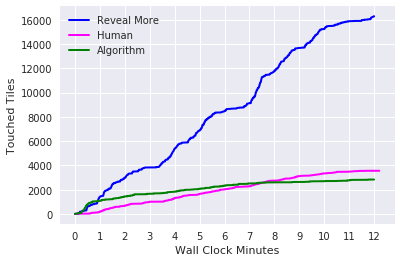

In [17]:
expansion_constant = 7 if "Zelda" in load_directory else 12
run_len = 17 if "Zelda" in load_directory else 12

linewidth = 2
fig = plt.figure()
ax = plt.axes()

human_expanded_allposibilites = np.array([[value] * expansion_constant for value in human_dict["all_possibilities_len"]]).flatten()

x_axis = range(len(combo_dict["all_possibilities_len"]))
ax.plot(x_axis, combo_dict["all_possibilities_len"], color="blue", label="Reveal More", linewidth=linewidth)

x_axis = list(range(len(human_expanded_allposibilites)))
ax.plot(x_axis, human_expanded_allposibilites, color="magenta", label="Human", linewidth=linewidth)

x_axis = range(len(alg_dict["all_possibilities_len"]))
ax.plot(x_axis, alg_dict["all_possibilities_len"], color="green", label="Algorithm", linewidth=linewidth)

# x_axis = range(len(forest_dict["all_possibilities_len"]))
# ax.plot(x_axis, forest_dict["all_possibilities_len"], color="orange", label="Forest")


plt.xticks(np.arange(0, run_len + 1) * (len(combo_dict["all_possibilities_len"]) / run_len), x_axis)
plt.xlabel('Wall Clock Minutes') 
plt.ylabel('Touched Tiles') 

plt.legend()
plt.savefig('ZeldaGraph.pdf')
# plt.savefig(f'{result_dir_path}/Total Touched Tiles {title_name}.png')
# plt.savefig(f'{all_graphs_path}/Total Touched Tiles {title_name}.png') log_data_romhack_rrt

In [18]:
# SMW MAP Visualization


In [19]:
# MARIO VISUALIZATION

In [58]:
# 39 = menu
# 65 = intro
# 0 = overworld
# 89 = Yoshis house
# 202 = 1-1

# 50 = 1-2
# 127 = 1-2 cave

# 147 = 1-3
# 244 = 1-4
# 89 = 1-4 2

# 238 = iggy
# 111
# 208

# 70 = yellow switch
# 75 = yellow switch 2

# 68 is deepest
# 11 top height in starting camera
# 22 ground in starting camera
# 306 farthest
img_path = "Mario_Map/SMW_World"
level1_1 = plt.imread(f"{img_path}/1-1.png")
level1_2 = plt.imread(f"{img_path}/1-2.png")
level1_3 = plt.imread(f"{img_path}/1-3.png")
level1_4 = plt.imread(f"{img_path}/1-4.png")
level1_5 = plt.imread(f"{img_path}/1-5.png")

level_to_img = dict()
level_to_img[202] = level1_1
level_to_img[50]  = level1_2
level_to_img[147] = level1_3
level_to_img[244] = level1_4

level_to_img[238] = level1_5

level_to_img[111] = level1_5
level_to_img[208] = level1_5
level_to_img[191] = level1_5

def visualize():
    global dot_size
    fig = plt.figure(figsize=(5120.0 / 96.0, 720.0 / 96.0), dpi=96)
    for i in range(len(selected_dicts)):
        color = selected_colors[i]
        selected_dict = selected_dicts[i]
        level_stores = {} #dictionary taking in a level as a key and y coordinates at said level as an attribute
        x_values = []    #list containing all x values from the log

        input_start = 0
        input_end = 68

        output_end = 68
        output_start = 0 

        img_to_show = level_to_img[level_to_visaulize]

        for map_x_y in selected_dict["x_y_level"]:          # loop through every attribute in log_dict
            if map_x_y[2] < 68:                          # ensures that the y value is not erroniously large
                y_normalized = output_start + ((output_end - output_start) / (input_end - input_start)) * (map_x_y[2] - input_start)#inverts the y value

                if map_x_y[0] not in level_stores.keys(): # checks if the current level has a list creates a key, list pairing if it does not
                    level_stores[map_x_y[0]] = []

                if map_x_y[0] == 89:
                    if 244 not in level_stores.keys(): # checks if the current level has a list creates a key, list pairing if it does not
                        level_stores[244] = []
                    level_stores[244].append((map_x_y[1] + 173, y_normalized - 1))   # appends the inverted y value to the list associated with the current level key
                
                if map_x_y[0] == 208:
                    if 111 not in level_stores.keys(): # checks if the current level has a list creates a key, list pairing if it does not
                        level_stores[111] = []
                    level_stores[111].append((map_x_y[1] + 193, y_normalized + 19)) 
                
                if map_x_y[0] == 191:
                        if 111 not in level_stores.keys(): # checks if the current level has a list creates a key, list pairing if it does not
                            level_stores[111] = []
                        level_stores[111].append((map_x_y[1] + 129, y_normalized))   # appends the inverted y value to the list associated with the current level key
                
                else:
                    level_stores[map_x_y[0]].append((map_x_y[1], y_normalized))   # appends the inverted y value to the list associated with the current level key

        level_data = np.array(level_stores[level_to_visaulize])

        ax = plt.axes()
        ax.imshow(img_to_show, alpha = img_alpha)
        dot_size = dot_size - (dot_size * dot_reduction  * i)
        ax.scatter( level_data[:,0] * tile_size + x_offset + i * second_offset, 
                   (level_data[:,1] * tile_size) + y_offset + i * second_offset, 
                    s= dot_size,
                    c=color, alpha=alpha, linewidths=edge_width, edgecolors=edge_color,
                    marker=selected_markers[i])
        plt.axis('off')
    plt.savefig(f"{file_name}.png", bbox_inches = 'tight', pad_inches = 0, dpi=500)

/home/batu/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


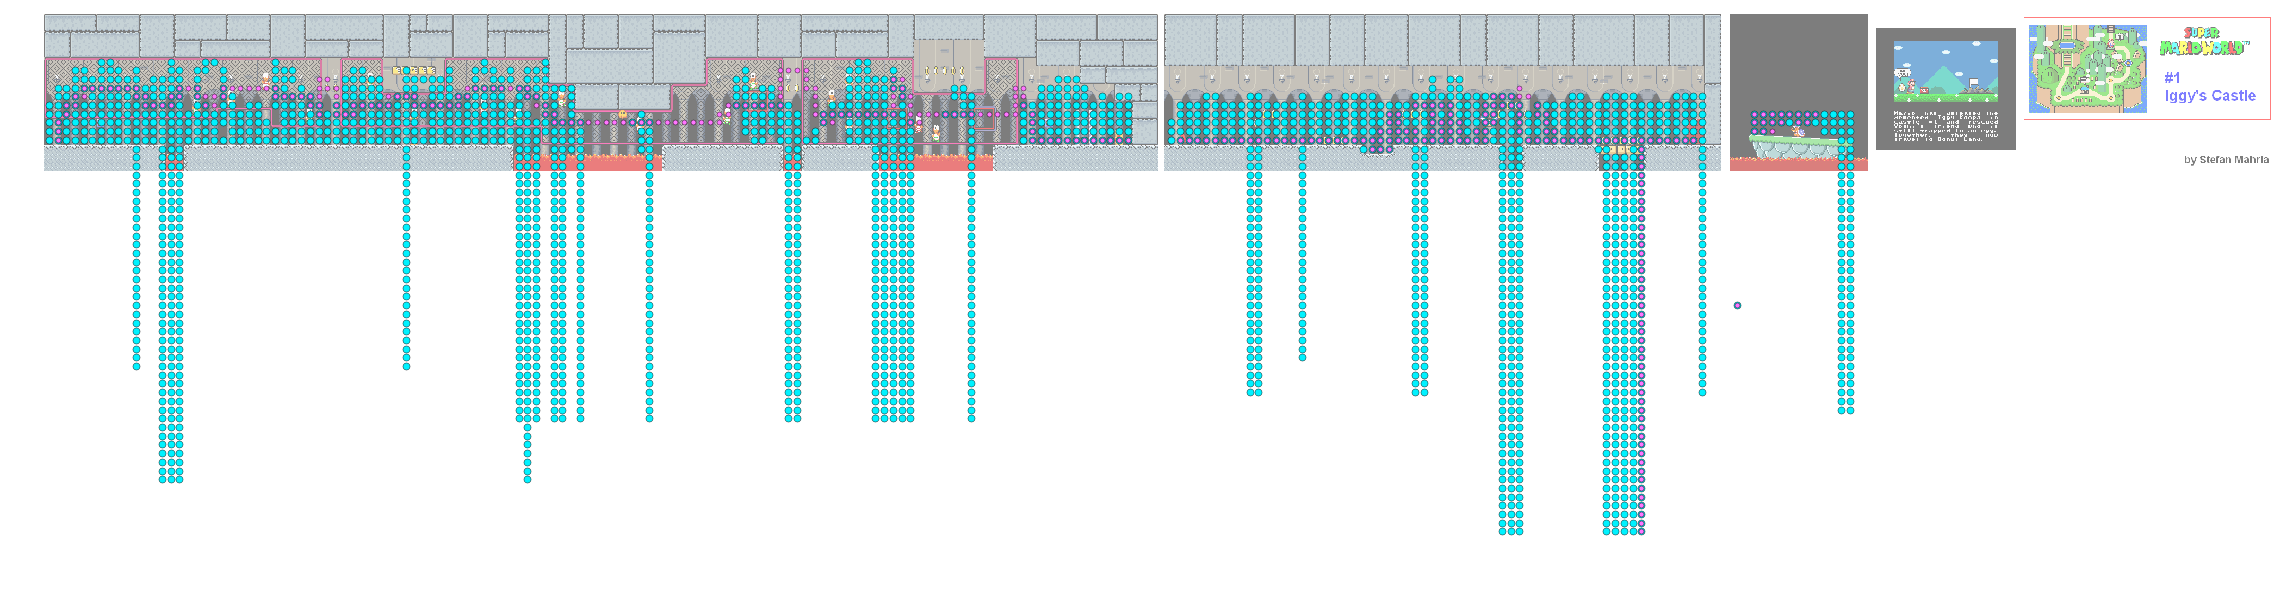

In [71]:
with open(f"{load_directory}/romhack_human.pickle", "rb") as file:
    hack_human_dict = pickle.load(file) 
    
with open(f"{load_directory}/romhack_rrt.pickle", "rb") as file:
    hack_combo_dict = pickle.load(file) 
    
file_name = "1-5_combo"
selected_dicts = [hack_combo_dict, combo_dict]
selected_dicts = [hack_human_dict, human_dict]

selected_colors = ["blue" , "magenta"]

selected_dicts = [combo_dict, human_dict]
selected_colors = ["#00f2ff" , "#ff75ff"]
selected_markers = ["o", "o"]

# selected_colors = ["#ff75ff"]

level_to_visaulize = 111
# 202 = 1-1
# 50 = 1-2
# 147 = 1-3
# 244 = 1-4
# 111 = castle


alpha = 1
img_alpha = .3

dot_size = 28
dot_reduction = .5

edge_width = 0.3
edge_color = "black"

second_offset = 0
# 1-1 --> 350
# 1-2 --> 200
final_crop_height = 350

tile_size = 16
x_offset = 12
y_offset = 24 # More is down

log_dir = "Mario_Map/Overlayed"


# levels = [202, 50, 147, 244, 111]
# for level in levels:
#     level_to_visaulize = level
#     visualize()
# level_to_visaulize = 244
x_offset = 8
y_offset = -122 # More is down
visualize()

# igies castle:


In [67]:
# Experiment 3 Data
# file_name = "1-2_RomHackHuman"
# # selected_dicts = [hack_combo_dict, combo_dict]
# selected_dicts = [hack_human_dict, human_dict]
# selected_colors = ["blue", "yellow" ]

In [23]:
# ZELDA VISUALIZATION
with open("Experiment_1/VizDirZelda/human.pickle", "rb") as file:
    zelda_human_dict = pickle.load(file) 
    
with open("Experiment_1/VizDirZelda/combo.pickle", "rb") as file:
    zelda_combo_dict = pickle.load(file) 
    
img_to_show = plt.imread(f"Zelda_Map/albwmap.png")

In [24]:
def visualize_zelda():
    fig = plt.figure(figsize=(692.0 / 48.0, 531.0 / 48.0), dpi=96)
    for i in range(len(selected_dicts)):
        color = selected_colors[i]
        selected_dict = selected_dicts[i]
        zelda_levels = dict()
        for map_x_y in selected_dict["x_y_level"]:

            if map_x_y[1] == 44:
                if 27 not in zelda_levels.keys(): # checks if the current level has a list creates a key, list pairing if it does not
                    zelda_levels[27] = []
                if map_x_y[2] < 160 and map_x_y[3] < 200:
                    zelda_levels[27].append((map_x_y[2], map_x_y[3])) 

            if map_x_y[1] == 43:
                if 27 not in zelda_levels.keys(): # checks if the current level has a list creates a key, list pairing if it does not
                    zelda_levels[27] = []
                if map_x_y[2] > 0:
                    zelda_levels[27].append((map_x_y[2], map_x_y[3])) 
            else:
                if map_x_y[1] not in zelda_levels.keys(): 
                    zelda_levels[map_x_y[1]] = []
                if(map_x_y[2] > 100 and map_x_y[3] > 50) and (map_x_y[2] < 160 and map_x_y[3] < 500):
                    zelda_levels[map_x_y[1]].append((map_x_y[2], map_x_y[3])) 

            level_data = np.array(zelda_levels[27])
            level_data.shape

        ax = plt.axes()
        ax.imshow(img_to_show, alpha = img_alpha)
        ax.scatter( level_data[:,0] * tile_size + x_offset, 
                   (level_data[:,1] * tile_size)+ y_offset,
                    s= dot_size - (dot_size * dot_reduction  * i),
                    c=color, alpha=alpha, linewidths=edge_width, edgecolors=edge_color) 
        plt.axis('off')
    plt.savefig("ZeldaMap.pdf")

/home/batu/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


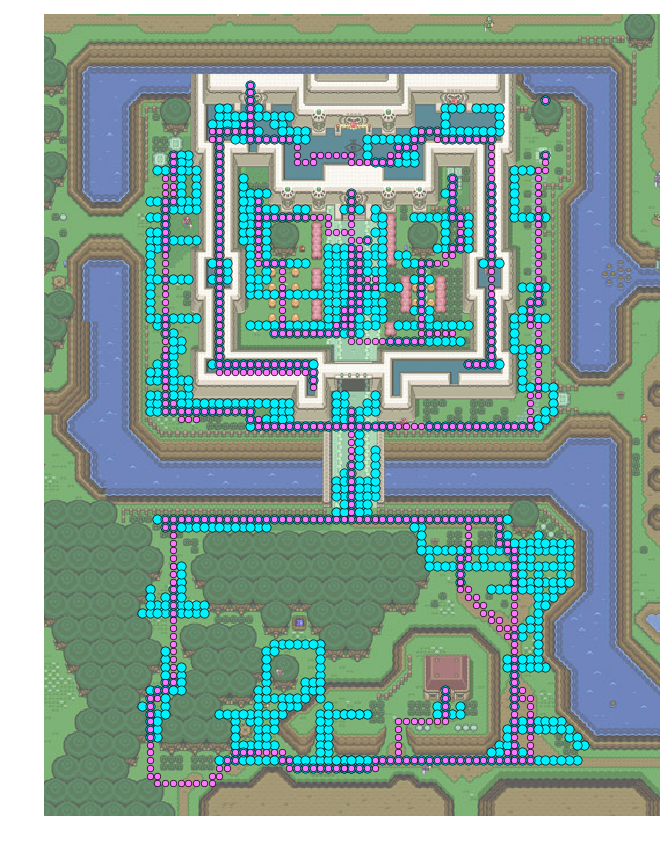

In [25]:
tile_size = 6.7
x_offset = -87.5 * tile_size
y_offset = -87 * tile_size 

color = "red"
alpha = 1
img_alpha = .5

dot_size = 48
dot_reduction = .5

edge_width = .5
edge_color = "black"

file_name = "1-5_hack_human"

selected_dicts = [zelda_combo_dict, zelda_human_dict]
selected_colors = ["#00f2ff" , "#ff75ff"]

visualize_zelda()